In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns

from scipy.stats import pearsonr

import matplotlib.pyplot as plt

In [2]:
gene_ad = sc.read_h5ad('datasets/gut_data_aug_11_2024.h5ad')

In [3]:
gene_ad

AnnData object with n_obs × n_vars = 3677 × 14332
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'potential_doublet', 'sample', 'raw_biotin', 'cell_norm_biotin', 'sample_type', 'leiden', 'leiden ', 'log normalized biotin', 'normalized biotin', 'S_score', 'G2M_score', 'phase', 'annotation', 'annotation ', ' leiden ', 'cluster', ' annotation ', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ

In [4]:
from scipy.stats import spearmanr

In [7]:
import sys

# Machine epsilon for float
epsilon = sys.float_info.epsilon

In [9]:
tiny = np.finfo(float).tiny

In [11]:
biotin = gene_ad.obs['raw_biotin']

In [12]:
rna_libsize = gene_ad.obs['total_counts']

In [13]:
sample_hashtag = gene_ad.obs['avg_sample_hto']

In [14]:
mycorr = spearmanr(biotin, sample_hashtag)

Text(0.5, 1.0, 'uLIPSTIC Gut\n correlation = 0.69, sig. < 2.2e-308')

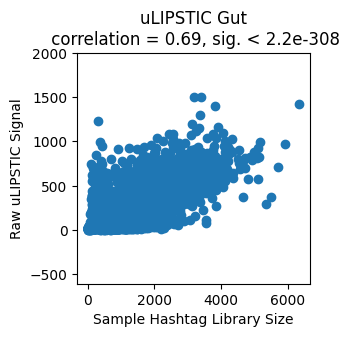

In [16]:
plt.figure(figsize=(3,3))
plt.scatter(sample_hashtag, biotin)
plt.ylim(top=2000)
#plt.xlim(right=3000)
plt.xlabel('Sample Hashtag Library Size')
plt.ylabel('Raw uLIPSTIC Signal')
plt.title(f"uLIPSTIC Gut\n correlation = {mycorr[0]:0.2}, sig. < {tiny:0.2}")

In [17]:
mycorr = spearmanr(biotin, rna_libsize)

Text(0.5, 1.0, 'uLIPSTIC Gut\n correlation = 0.59, sig. < 2.2e-308')

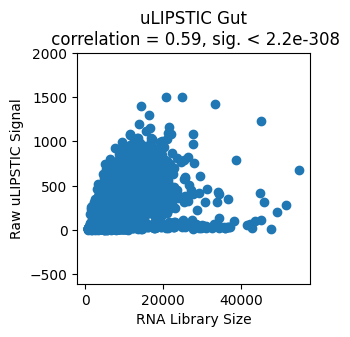

In [19]:
plt.figure(figsize=(3,3))
plt.scatter(rna_libsize, biotin)
plt.ylim(top=2000)
plt.xlabel('RNA Library Size')
plt.ylabel('Raw uLIPSTIC Signal')
plt.title(f"uLIPSTIC Gut\n correlation = {mycorr[0]:0.2}, sig. < {tiny:0.2}")

In [20]:
gene_ad = sc.read_h5ad('datasets/lipstic_tumor_data_aug_11_2024.h5ad')

In [21]:
gene_ad

AnnData object with n_obs × n_vars = 10346 × 10898
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.mt.log2', 'nCount_HTO', 'nFeature_HTO', 'nCount_ADT', 'nFeature_ADT', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'hash.ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'Hash', 'Enrichment', 'Ab_Group', 'S.Score', 'G2M.Score', 'Phase', 'Phase2', 'Biotin_Group2', 'Biotin_Ab_Group', 'Lipstic1', 'hash_max', 'hash_id', 'biotin_raw', 'n_counts', 'new_biotin', 'other_new_biotin', 'log_sample_hashtag', 'log_RNA_libsize', 'annotation', 'annotation_fine'
    var: 'name', 'n_counts'
    uns: 'log1p', 'pearson_residuals_normalization'
    obsm: 'X_pca', 'X_umap'
    layers: 'log_lib_norm', 'raw_counts', 'theta_1'

In [22]:
from scipy.stats import spearmanr

In [23]:
biotin = gene_ad.obs['biotin_raw']

In [24]:
rna_libsize = gene_ad.obs['nCount_RNA']

In [25]:
sample_hashtag = gene_ad.obs['hash_max']

In [26]:
mycorr = spearmanr(biotin, sample_hashtag)

Text(0.5, 1.0, 'LIPSTIC v1 Tumor\n correlation = 0.28, sig. = 7.6e-182')

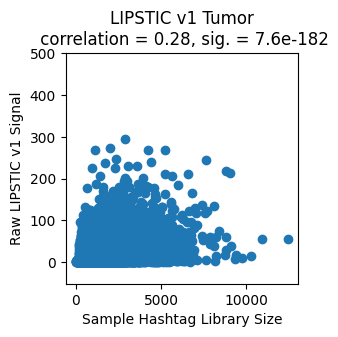

In [27]:
plt.figure(figsize=(3,3))
plt.scatter(sample_hashtag, biotin)
plt.ylim(top=500)
#plt.xlim(right=3000)
plt.xlabel('Sample Hashtag Library Size')
plt.ylabel('Raw LIPSTIC v1 Signal')
plt.title(f"LIPSTIC v1 Tumor\n correlation = {mycorr[0]:0.2}, sig. = {mycorr[1]:0.2}")

In [28]:
mycorr = spearmanr(biotin, rna_libsize)

Text(0.5, 1.0, 'LIPSTIC v1 Tumor\n correlation = 0.11, sig. = 2.5e-31')

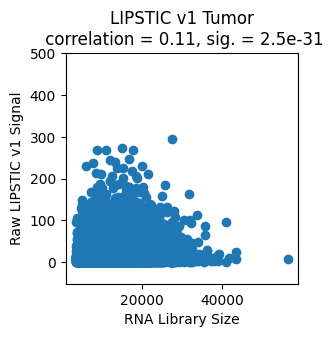

In [29]:
plt.figure(figsize=(3,3))
plt.scatter(rna_libsize, biotin)
plt.ylim(top=500)
plt.xlabel('RNA Library Size')
plt.ylabel('Raw LIPSTIC v1 Signal')
plt.title(f"LIPSTIC v1 Tumor\n correlation = {mycorr[0]:0.2}, sig. = {mycorr[1]:0.2}")